## Data validity checks to be carried out on initial collection prior to ingress into TrustVault

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfllc = pd.read_csv('../Data/pfizerv2_2.llc', sep='\t')

In [4]:
def epoch_to_datetime(epoch_time):
    import datetime
    return datetime.datetime.fromtimestamp(epoch_time)

In [5]:
dfllc['realtime'] = dfllc['DateTime'].apply(epoch_to_datetime)

In [6]:
dfllc.head(2)

,From,To,Direction,DateTime,realtime
0,792439@433833.test,562066@0.test,inbound,1670911056,2022-12-13 18:57:36
1,817739@77610.test,794179@0.test,inbound,1670911322,2022-12-13 19:02:02


In [10]:
dfllc.shape

(2984770, 5)

In [7]:
dfllc.Direction.value_counts()

inbound     1617435
internal    1117257
outbound     250078
Name: Direction, dtype: int64

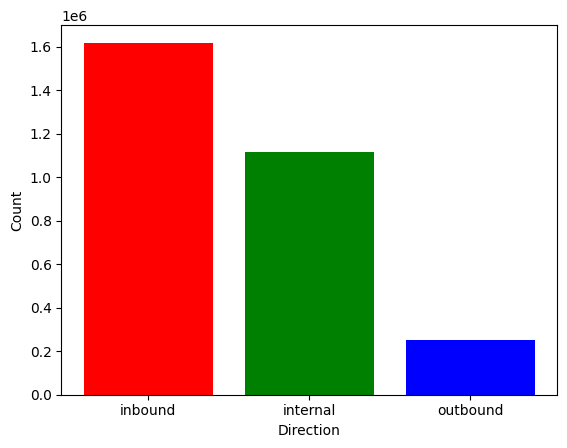

In [8]:
import matplotlib.pyplot as plt

counts = dfllc.Direction.value_counts()
# Define a list of color codes
colors = ['red', 'green', 'blue', 'orange']  
plt.bar(counts.index, counts.values, color=colors)
plt.xlabel('Direction')
plt.ylabel('Count')
#plt.legend(['Direction counts'])
plt.show()

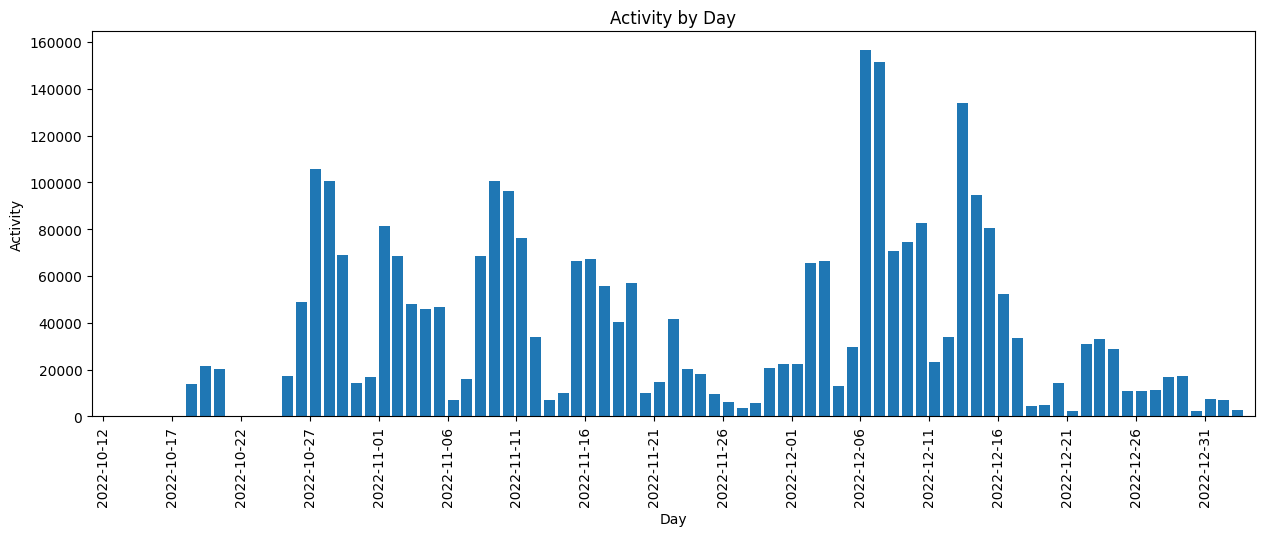

In [9]:
# Convert datetime strings to pandas datetimes
dfllc['realtime'] = pd.to_datetime(dfllc['realtime'])

# Group by day and count occurrences
day_counts = dfllc.groupby(dfllc['realtime'].dt.date)['realtime'].count()

# Set figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Plot bar chart with x-axis showing days
bar_width = 0.8
plt.bar(day_counts.index, day_counts.values, 
        width=bar_width, align='edge')
plt.title('Activity by Day')
plt.xlabel('Day')
plt.ylabel('Activity')

# Set x-axis ticks for every day
ticks = pd.date_range(start=day_counts.index.min(), 
                      end=day_counts.index.max(), freq='5D')
plt.xticks(ticks=ticks, rotation=90)

# Add padding between bars
plt.margins(x=0.01)

plt.show()